In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings


In [16]:
# Load preprocessed arrays from notebook 1
X_train = np.load("../data/X_train.npy")
X_test  = np.load("../data/X_test.npy")
y_train = np.load("../data/y_train.npy")
y_test  = np.load("../data/y_test.npy")

print("Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


Shapes:
X_train: (398, 30) X_test: (171, 30)
y_train: (398,) y_test: (171,)


In [17]:
print("\n--- Softmax Regression ---")

# Suppress warnings for clean output
with warnings.catch_warnings():
    warnings.filterwarnings(
        action='ignore',
        category=FutureWarning,
        module='sklearn.linear_model._logistic'
    )
    
    # Initialize Softmax (multinomial) Logistic Regression
    softmax_model = LogisticRegression(
        multi_class='multinomial', 
        solver='lbfgs', 
        max_iter=3000,      # same epochs logic as others
        random_state=42
    )
    softmax_model.fit(X_train, y_train)

# Predictions
y_pred_softmax = softmax_model.predict(X_test)



--- Softmax Regression ---


In [18]:
# Classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred_softmax, target_names=['Benign (0)', 'Malignant (1)']))

# Confusion matrix & accuracy
cm = confusion_matrix(y_test, y_pred_softmax)
acc = accuracy_score(y_test, y_pred_softmax)

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print(f"Test Accuracy: {acc:.4f}")
print(f"TPR: {TPR:.4f}, TNR: {TNR:.4f}, FPR: {FPR:.4f}, FNR: {FNR:.4f}")
print("Confusion Matrix:\n", cm)



Classification Report:
                precision    recall  f1-score   support

   Benign (0)       0.98      0.98      0.98        64
Malignant (1)       0.99      0.99      0.99       107

     accuracy                           0.99       171
    macro avg       0.99      0.99      0.99       171
 weighted avg       0.99      0.99      0.99       171

Test Accuracy: 0.9883
TPR: 0.9907, TNR: 0.9844, FPR: 0.0156, FNR: 0.0093
Confusion Matrix:
 [[ 63   1]
 [  1 106]]


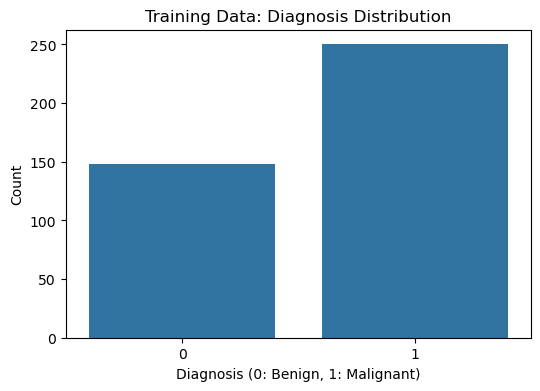

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Training Data: Diagnosis Distribution')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()


C:\Users\alaas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


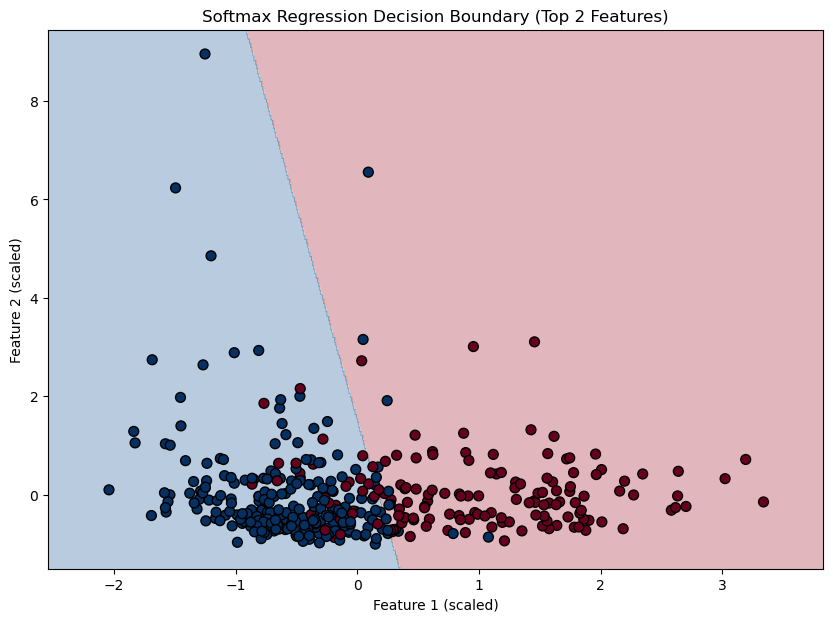

In [20]:
# Select two top features for visualization
feature_indices = [0, 19]  # 'mean radius' & 'fractal dimension worst' as example
X_plot_train = X_train[:, feature_indices]
X_plot_test  = X_test[:, feature_indices]

# Retrain Softmax model on two features
softmax_plot = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000, random_state=42)
softmax_plot.fit(X_plot_train, y_train)

# Meshgrid for decision boundary
x_min, x_max = X_plot_train[:,0].min()-0.5, X_plot_train[:,0].max()+0.5
y_min, y_max = X_plot_train[:,1].min()-0.5, X_plot_train[:,1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = softmax_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z_class = Z.reshape(xx.shape)

plt.figure(figsize=(10,7))
plt.contourf(xx, yy, Z_class, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X_plot_train[:,0], X_plot_train[:,1], c=y_train, edgecolor='k', cmap=plt.cm.RdBu, s=50)
plt.title("Softmax Regression Decision Boundary (Top 2 Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


In [21]:
import joblib
joblib.dump(softmax_model, "../saved_models/softmax_model.pkl")
print("Softmax Regression model saved!")


Softmax Regression model saved!
